In [7]:
import torch
import torchvision

from yolort.utils.graph_utils import make_graph
from hubconf import yolov5s

In [8]:
model = yolov5s(pretrained=True)
model = model.eval()

In [9]:
class Detection(torch.nn.Module):
    def __init__(self,model):
        super().__init__()
        self.m = model
        self.m = self.m.eval()
    def forward(self, inp):
        assert inp.shape[0] == 1
        res, = self.m(inp)
        return res['boxes'], res['labels'], res['scores']

In [10]:
tm = torch.jit.trace(Detection(model), [torch.randn(1, 3, 224, 224)], check_trace=False)

/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/pytorch_lightning/core/lightning.py:169: LightningDeprecationWarning: The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5. Access the datamodule through using `self.trainer.datamodule` instead.
  "The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5."
/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  import sys
/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/torch/tensor.py:590: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't

In [11]:
d = make_graph(tm.m, classes_to_visit={})
d.render('./data-bin/output/yolov5.highlevel')

'./data-bin/output/yolov5.highlevel.svg'

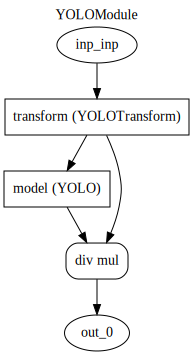

In [12]:
d

In [13]:
from yolort.models import yolov5s

model_rt = yolov5s(pretrained=True)
model_rt = model_rt.eval()

tm_rt = torch.jit.trace(Detection(model_rt), [torch.randn(1,3, 640, 640)], check_trace=False)

dd = make_graph(tm_rt.m, classes_to_visit={'YOLOTransform','YOLO'})
dd.render('./data-bin/output/yolov5_rt.highlevel')

/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/pytorch_lightning/core/lightning.py:169: LightningDeprecationWarning: The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5. Access the datamodule through using `self.trainer.datamodule` instead.
  "The `LightningModule.datamodule` property is deprecated in v1.3 and will be removed in v1.5."
/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  import sys
/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/torch/tensor.py:590: RuntimeWarning: Iterating over a tensor might cause the trace to be incorrect. Passing a tensor of different shape won't

'./data-bin/output/yolov5_rt.highlevel.svg'

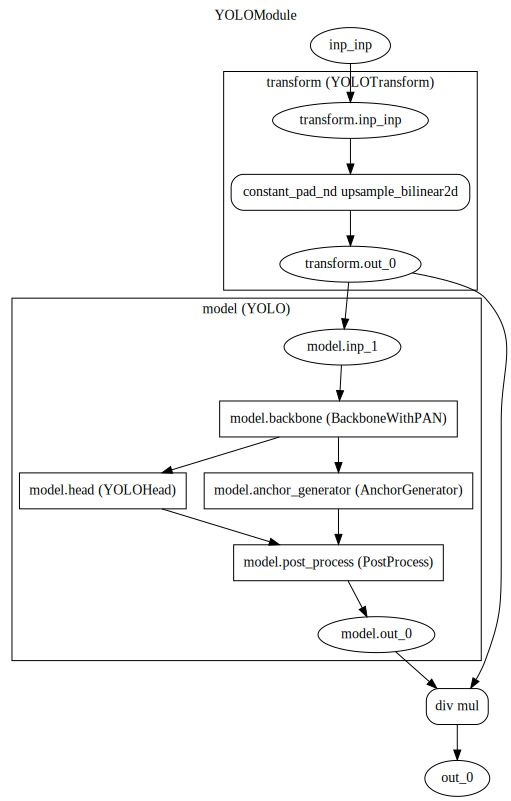

In [14]:
dd

In [15]:
from yolort.models.yolo import yolov5_darknet_pan_s_r40 as yolov5s

model = yolov5s()
model = model.eval()

tm = torch.jit.trace(Detection(model), [torch.randn(1,3, 640, 640)], check_trace=False)

dd = make_graph(tm.m, classes_to_visit={"YOLOHead"})
dd.render('./data-bin/output/yolov5_rt_raw.highlevel')

/environment/python/versions/miniconda3-4.7.12/lib/python3.7/site-packages/ipykernel_launcher.py:7: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  import sys
/cloud/yolov5-rt-stack/yolort/models/anchor_utils.py:31: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this function to create tensors out of constant variables that would be the same every time you call this function. In any other case, this might cause the trace to be incorrect.
  stride = torch.as_tensor([stride], dtype=dtype, device=device)
/cloud/yolov5-rt-stack/yolort/models/anchor_utils.py:50: TracerWarning: torch.as_tensor results are registered as constants in the trace. You can safely ignore this warning if you use this funct

'./data-bin/output/yolov5_rt_raw.highlevel.svg'

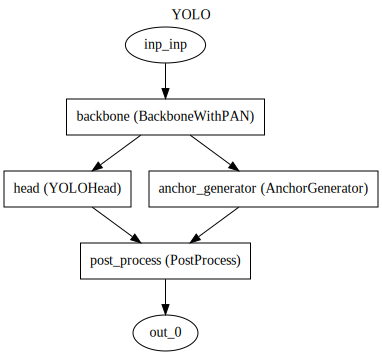

In [16]:
dd